<a href="https://colab.research.google.com/github/Namyalg/Topic-Modeling/blob/master/covid_title_LSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import nltk
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt")
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
stop = set(stopwords.words('english'))
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from gensim.models import LsiModel
import string
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
import csv
from csv import reader
tit = []
with open("/content/COVID-19_title.csv", 'r') as read_obj:
    # pass the file object to reader() to get the reader object
    csv_reader = reader(read_obj)
    # Iterate over each row in the csv using reader object
    for row in csv_reader:
        # row variable is a list that represents a row in csv
        tit.append(row)

In [6]:
val = []
for i in tit:
  val.append(i[0])

In [14]:

tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = set(stopwords.words('english'))
# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()
    
doc_set = val
# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
    texts.append(tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]


In [13]:
print(dictionary)

Dictionary(75509 unique tokens: ['abdulaziz', 'arabia', 'clinical', 'culture', 'features']...)


In [4]:
from gensim.models.coherencemodel import CoherenceModel

In [15]:
lsamodel = LsiModel(corpus, num_topics=4, id2word = dictionary) 

In [16]:
print(lsamodel.print_topics(num_topics=4, num_words=4))

[(0, '0.690*"covid" + 0.683*"19" + 0.085*"patients" + 0.080*"pandemic"'), (1, '0.568*"sars" + 0.537*"cov" + 0.514*"2" + 0.174*"coronavirus"'), (2, '0.656*"coronavirus" + 0.363*"disease" + 0.326*"2019" + 0.227*"respiratory"'), (3, '0.422*"respiratory" + 0.396*"patients" + -0.353*"coronavirus" + 0.280*"acute"')]


In [20]:
coherence_values = []
model_list = []
for num_topics in range(2, 12, 2):
    # generate LSA model
    model = LsiModel(corpus, num_topics=num_topics, id2word = dictionary)  # train model
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

In [22]:
import matplotlib.pyplot as plt


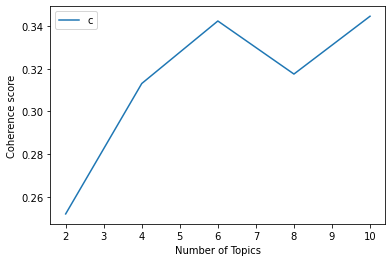

In [23]:
x = range(2, 12, 2)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [18]:
coherencemodel = CoherenceModel(model=lsamodel, texts=texts, dictionary=dictionary, coherence='c_v')
print(coherencemodel.get_coherence())

0.3166299737625062


In [ ]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=6, id2word = dictionary, passes=180)